In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'figure.dpi': '500'})

with open(r"C:\Users\ahmed\Downloads\asu.tsv", 'r') as file:
    lines = file.readlines()
#%matplotlib ipympl
kic_list = []
ra_list = []
de_list = []

in_data_section = False

for line in lines:
    line = line.strip()
    
    # Skip comments and empty lines
    if line.startswith('#') or not line:
        in_data_section = False
        continue
    
    # Check for the header line that precedes data
    if line.startswith('_RAJ2000;_DEJ2000;KIC;RAJ2000;DEJ2000'):
        in_data_section = True
        continue
    
    # Skip the units line (deg;deg; ;deg;deg)
    if line.startswith('deg;deg; ;deg;deg'):
        continue
    
    
    if line.startswith('------------;------------;--------;----------;----------'):
        continue
    
    if in_data_section:
        parts = line.split(';')
        if len(parts) >= 5:
          
            ra = float(parts[3].strip())
            de = float(parts[4].strip())
            kic = int(parts[2].strip())
            
            ra_list.append(ra)
            de_list.append(de)
            kic_list.append(kic)


kic_array = np.array(kic_list)
ra_array = np.array(ra_list)
de_array = np.array(de_list)

print("KIC array:", kic_array[:5])
print("RA array (degrees):", ra_array[:5])
print("DE array (degrees):", de_array[:5])
print(f"Total entries: {len(kic_array)}")


KIC array: [6231538 6606229 6963490 7300184 7900367]
RA array (degrees): [298.64798 291.85559 295.8869  296.78571 294.93735]
DE array (degrees): [41.51173  42.00861  42.454819 42.80331  43.695919]
Total entries: 111


In [5]:
import numpy as np
import pandas as pd

# Read the file
with open(r"C:\Users\ahmed\Downloads\asu (2).tsv", 'r') as file:
    lines = file.readlines()

# Initialize lists to store KIC and kepmag
kic_list = []
kepmag_list = []

# Flag to indicate when we're in a data section
in_data_section = False

for line in lines:
    line = line.strip()
    
    # Skip comments and empty lines
    if line.startswith('#') or not line:
        in_data_section = False
        continue
    
    # Check for the header line that precedes data
    if line.startswith('_1;KIC;kepmag'):
        in_data_section = True
        continue
    
    # Skip the units line ( ; ;mag)
    if line.startswith(' ; ;mag'):
        continue
    
    # Skip the dashed line (----------------------------------------;--------;------)
    if line.startswith('----------------------------------------;--------;------'):
        continue
    
    # Process data lines
    if in_data_section:
        parts = line.split(';')
        if len(parts) >= 3:
            # Extract KIC (strip whitespace and convert to int)
            kic = str(parts[1].strip())
            if kic == '':
                continue
            # Extract kepmag (strip whitespace and convert to float)
            kepmag = str(parts[2].strip())
            
            kic_list.append(kic)
            kepmag_list.append(kepmag)

# Convert to NumPy arrays
kic_array = np.array(kic_list)
kepmag_array = np.array(kepmag_list)

df = pd.DataFrame({'KIC': kic_array, 'Magnitude in Kepler Band': kepmag_array})
df.to_csv(r"C:\Users\ahmed\research_delta\ResearchPython\kepler_magnitudes", index = False)
# Print some information to verify
print("KIC array:", kic_array[:-1])
print("kepmag array:", kepmag_array[:-1])
print(f"Total entries: {len(kic_array)}")



KIC array: ['6231538' '6606229' '6963490' '7300184' '7900367' '7915515' '9851822'
 '10350769' '10355055' '10415087' '11027806' '11769929' '12216817'
 '1849235' '3424493' '3648131' '3965879' '4072890' '8264404' '8330102'
 '8453431' '8493159' '8585472' '8845312' '9050337' '4544967' '4569150'
 '4577647' '4940217' '5108514' '5358323' '5900260' '9051991' '9306095'
 '9368220' '9368524' '9649801' '9775887' '9532219' '9594189' '9897710'
 '9717148' '2581626' '2972514' '3119295' '3953144' '4036687' '4066203'
 '4243668' '4374279' '4466691' '4547067' '4651526' '4995588' '5027750'
 '5284701' '5286485' '5353653' '5357882' '5534340' '5707205' '5788165'
 '6304420' '6442207' '6444630' '6778487' '6836820' '6955650' '7048016'
 '7124161' '7347529' '7521682' '7601767' '7617649' '7668283' '7750215'
 '7905603' '7937097' '7948091' '7984934' '8052082' '8087649' '8090059'
 '8144212' '8150307' '8245366' '8248967' '8249829' '8315263' '8393922'
 '8516900' '8648251' '8649814' '8960514' '8963394' '9075949' '9077483'

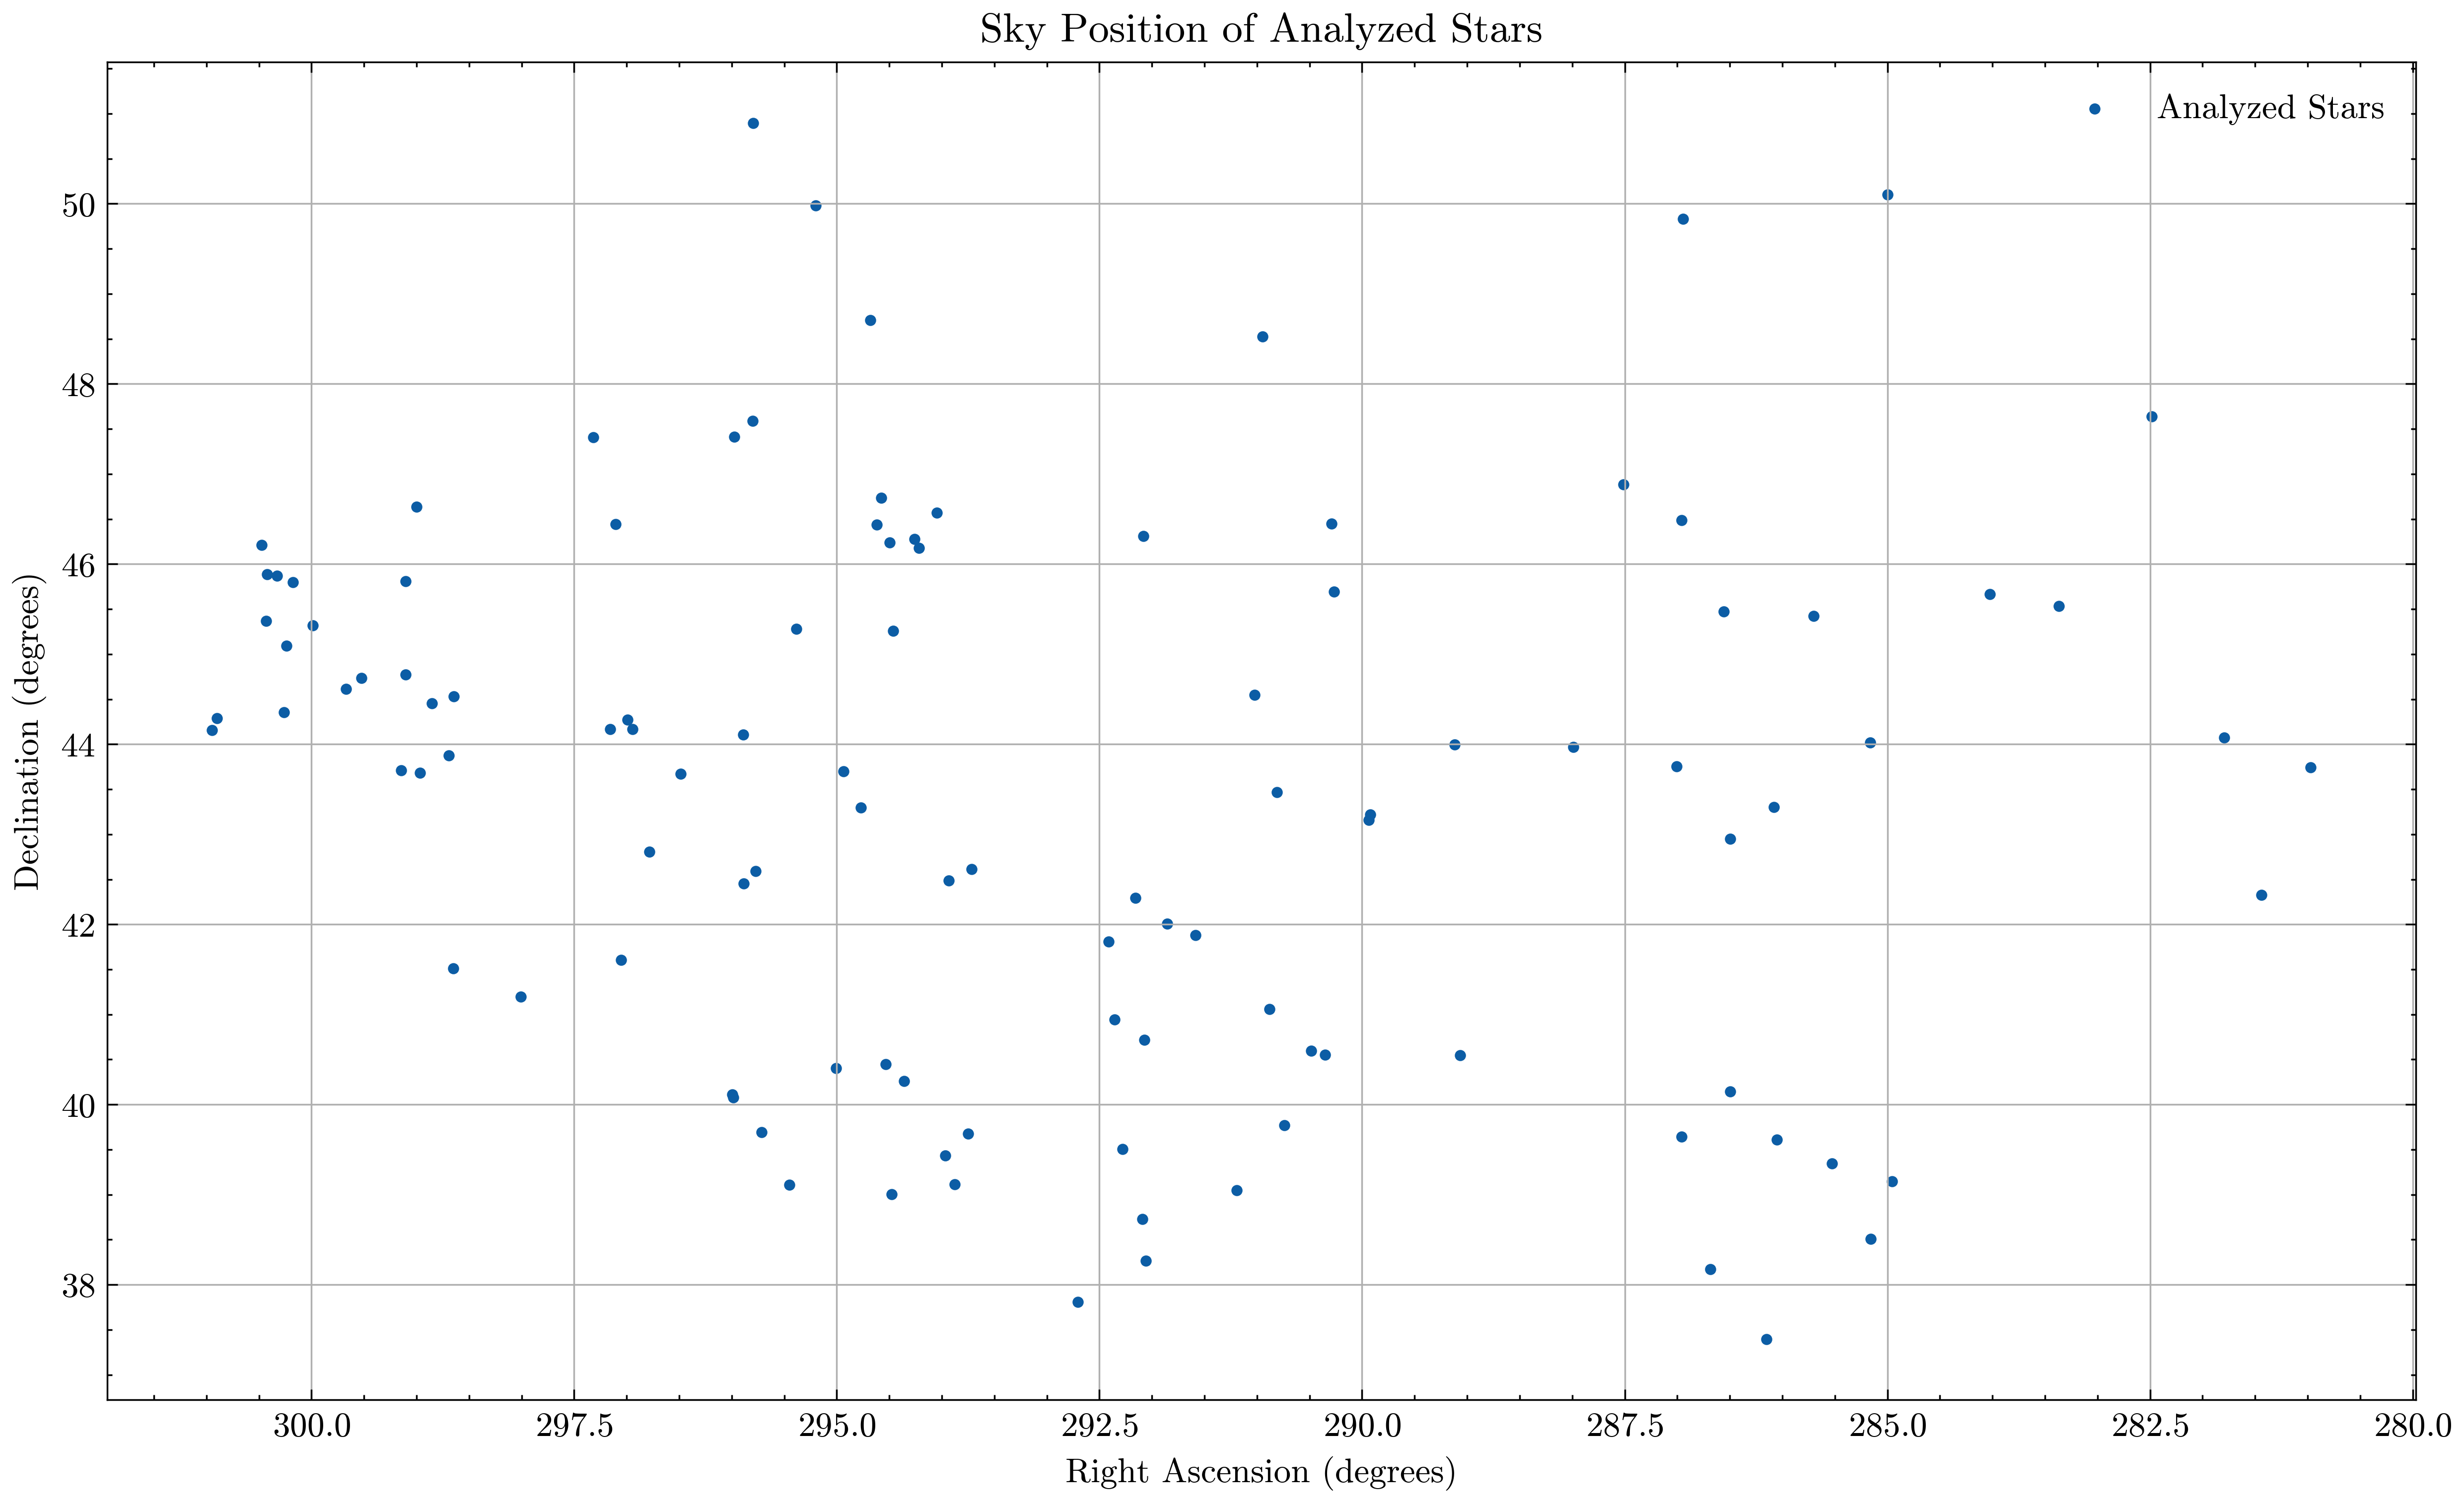

AttributeError: Figure.set() got an unexpected keyword argument 'projection'

<Figure size 6000x3500 with 0 Axes>

In [7]:
plt.figure(figsize=(12, 7))
plt.scatter(ra_array, de_array, s=5, label='Analyzed Stars')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Sky Position of Analyzed Stars')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

ra_shifted = np.where(ra_array > 180, ra_array - 360, ra_array)

ra_rad = np.radians(ra_shifted)
de_rad = np.radians(de_array)

plt.figure(figsize=(12, 7))
fig, ax = plt.subplots(111, projection="aitoff")
plt.scatter(ra_rad, np.radians(de_array), s=5)
plt.title('Sky Map in Aitoff Projection')
ax.locator_params(axis='x', nbins=5)
plt.grid(True)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig("my_plot.png")
plt.show()

In [9]:
import numpy as np
import pandas as pd
def getMaxFrequencies(csv_file_path):
    df = pd.read_csv(csv_file_path) 
    functions = df['Composite Function'].dropna().astype(str).tolist()
    KIC_list = df['KIC'].dropna().astype(str).tolist()
    epsilon_array = df['Average Epsilon'].dropna().astype(float).tolist()
    slope_array = df['slope'].dropna().astype(float).tolist()
    dev_array = df['standard dev'].dropna().astype(float).tolist()
    master_list_eps_devide = []
    try:
        for nameOfStar, sine_string, eps_val, dev_val, slope_val in zip(KIC_list, functions, epsilon_array, dev_array, slope_array):
            #pg, lightc = compGetPeriodogramData(f"KIC {nameOfStar}")
            print(nameOfStar)
            print(sine_string)
            if sine_string == "f(t) = 1.000100":
                master_list_eps_devide.append({"KIC": nameOfStar, "Epsilon/P_MAX": -1, "slope/P_MAX": -1,"dev/P_MAX": -1 })
                continue
            max_freq = find_max_frequency(sine_string)
            #print(nameOfStar)
            #x = lk.search_targetpixelfile(f"KIC {nameOfStar}", author = "Kepler").download().to_lightcurve()
            #z = x.to_periodogram()
            #pg = z
            #max_power_index = np.argmax(pg.power.value)
            P_max = (1/max_freq)
            a = eps_val/P_max
            sig_n =  dev_val/P_max
            slope_n = slope_val/P_max
            print(f" dominant freq {max_freq}")
            print(f"P_max is {P_max}")
            print(f"eps normalized = {a}")
            print(f"sig_n is {sig_n}")
            print(f"slope_n is {slope_n}") 
            print("------")
            
            master_list_eps_devide.append({"KIC": nameOfStar, "Epsilon/P_MAX": a, "slope/P_MAX": slope_n, "dev/P_MAX": sig_n})
    except Exception as e:
        print(e)
        df_new = pd.DataFrame(master_list_eps_devide)
        df_new.to_csv('KeplerStarsOutput_devided_eps_new_third_iteration_updated.csv', index=False)
        print("done")
    df_new = pd.DataFrame(master_list_eps_devide)
    df_new.to_csv('KeplerStarsOutput_devided_third_new_updated.csv', index=False)
    print("done")

import re

def find_max_frequency(function_string):
    """
    Parses a string representation of a function to find the maximum frequency.

    The script assumes frequencies are in the format: sin(2π * f * t), where 'f'
    is the frequency we want to extract.

    Args:
        function_string: The string containing the mathematical function.

    Returns:
        The maximum frequency found as a float, or None if no frequencies
        are found.
    """
    # This regular expression looks for numbers (including decimals) that are
    # positioned between "sin(2π * " and " * t"
    pattern = r"sin\(\s*2\?\?\s*\*\s*([0-9.]+)\s*\*\s*t"
    #pattern = r"sin\(2??\s*\*\s*([0-9.]+)\s*\*\s*t"

    # re.findall() returns a list of all matching strings
    frequencies = re.findall(pattern, function_string)

    if not frequencies:
        return None

    # Convert the list of strings to a list of floats and find the maximum
    max_frequency = [float(f) for f in frequencies][0]

    return max_frequency

getMaxFrequencies(r"C:\Users\ahmed\research_delta\ResearchPython\Master_Data_Sets_FULL\KEPLER\KeplerStarsOutput_fixed.csv")


6231538
f(t) = 1.000000 + 0.000800 * sin(2?? * 12.273100 * t + -0.878100) + 0.000100 * sin(2?? * 14.722700 * t + 0.333700)
 dominant freq 12.2731
P_max is 0.0814790069338635
eps normalized = -0.09846573125899999
sig_n is 0.0055279392441
slope_n is -0.0024226608476
------
6606229
f(t) = 1.000000 + 0.002100 * sin(2?? * 6.407900 * t + 1.655900) + 0.001300 * sin(2?? * 7.809200 * t + 0.456200) + 0.000700 * sin(2?? * 4.820700 * t + -1.190085) + 0.000300 * sin(2?? * 3.523400 * t + 0.750900) + 0.000300 * sin(2?? * 4.182000 * t + -2.490685) + 0.000300 * sin(2?? * 6.882100 * t + -0.542300)
 dominant freq 6.4079
P_max is 0.15605736668799453
eps normalized = 0.028850486814899996
sig_n is 0.26818045884490266
slope_n is 0.0002355981526212571
------
6963490
f(t) = 1.001200 + 0.006700 * sin(2?? * 7.140900 * t + -3.008000) + 0.002600 * sin(2?? * 7.570800 * t + -2.034400) + 0.001800 * sin(2?? * 11.376600 * t + 0.188600) + 0.000800 * sin(2?? * 6.710400 * t + -2.178600)
 dominant freq 7.1409
P_max is 0.14